# Data Investigation - Status

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Import Data

In [3]:
print('Loading Status Data...')

try:
    file_path_slug = '../../../datasets/bayareabikeshare/*_status_data.csv'

    # glob all files
    file_list = glob(file_path_slug)

    status_import = pd.DataFrame()

    counter = 1

    # load data from each file
    for file in file_list:

        chunks = []
        chunk_counter = 1
        chunksize = 10000
        num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True):

            # append chunk to chunks list
            chunks.append(chunk)

            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1

        if counter == 1:
            status_01 = pd.DataFrame()
            status_01 = pd.concat(chunks)
        elif counter == 2:
            status_02 = pd.DataFrame()
            status_02 = pd.concat(chunks)
        elif counter == 3:
            status_03 = pd.DataFrame()
            status_03 = pd.concat(chunks)
        elif counter == 4:
            status_04 = pd.DataFrame()
            status_04 = pd.concat(chunks)
        else:
            pass


        print('Finished file! (%d of %d)' % (counter, len(file_list)))
        counter += 1

    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')
    

Loading Status Data...
	[01:42:15.786967] finished chunk 1 of 1835
	[01:42:16.634392] finished chunk 74 of 1835
	[01:42:17.533270] finished chunk 148 of 1835
	[01:42:18.636636] finished chunk 222 of 1835
	[01:42:19.522585] finished chunk 296 of 1835
	[01:42:20.392601] finished chunk 370 of 1835
	[01:42:21.279342] finished chunk 444 of 1835
	[01:42:22.313566] finished chunk 518 of 1835
	[01:42:23.233058] finished chunk 592 of 1835
	[01:42:24.096199] finished chunk 666 of 1835
	[01:42:25.000135] finished chunk 740 of 1835
	[01:42:25.871939] finished chunk 814 of 1835
	[01:42:26.731093] finished chunk 888 of 1835
	[01:42:27.607945] finished chunk 962 of 1835
	[01:42:28.496327] finished chunk 1036 of 1835
	[01:42:29.400775] finished chunk 1110 of 1835
	[01:42:30.312440] finished chunk 1184 of 1835
	[01:42:31.225005] finished chunk 1258 of 1835
	[01:42:32.180955] finished chunk 1332 of 1835
	[01:42:33.086128] finished chunk 1406 of 1835
	[01:42:33.962532] finished chunk 1480 of 1835
	[01:42

# Clean and Write File

In [4]:
print('[%s] Started status_01[\'time\'] Cleaning' % datetime.datetime.now().time())
status_01['time']   = pd.to_datetime(status_01['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_02[\'time\'] Cleaning' % datetime.datetime.now().time())
status_02['time']   = pd.to_datetime(status_02['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_03[\'time\'] Cleaning' % datetime.datetime.now().time())
status_03['time']   = pd.to_datetime(status_03['time'],   format="%m/%d/%Y %H:%M:%S").values.astype('<M8[m]')
print('\t[%s] Complete!\n' % datetime.datetime.now().time())

print('[%s] Started status_04[\'time\'] Cleaning' % datetime.datetime.now().time())
status_04['time']   = pd.to_datetime(status_04['time'],   format="%Y/%m/%d %H:%M:%S").values.astype('<M8[m]')
print('\t[%s] Complete!\n' % datetime.datetime.now().time())


# COncat all frames
print('[%s] Starting concat' % datetime.datetime.now().time())
status_data_import = pd.DataFrame()
status_data_import = pd.concat([status_01, status_02, status_03, status_04])
print('\t[%s]Complete!\n' % datetime.datetime.now().time())
status_data_import.head()

[01:46:31.787650] Started status_01['time'] Cleaning
	[01:46:47.817217] Complete!

[01:46:47.817550] Started status_02['time'] Cleaning
	[01:47:17.558454] Complete!

[01:47:17.559042] Started status_03['time'] Cleaning
	[01:51:08.130922] Complete!

[01:51:08.131489] Started status_04['time'] Cleaning
	[01:51:19.634625] Complete!

[01:51:19.634941] Starting concat
	[01:51:38.267633]Complete!



,station_id,bikes_available,docks_available,time
0,2,12,15,2014-03-01 00:00:00
1,2,12,15,2014-03-01 00:01:00
2,2,12,15,2014-03-01 00:02:00
3,2,12,15,2014-03-01 00:03:00
4,2,12,15,2014-03-01 00:04:00


In [38]:
status_data = status_data_import.copy()
status_data.head(3)

,station_id,bikes_available,docks_available,time
0,2,12,15,2014-03-01 00:00:00
1,2,12,15,2014-03-01 00:01:00
2,2,12,15,2014-03-01 00:02:00


## Correct Relocated Stations

> There was a delay in station_id updates when stations 23, 24, 25, and 26 were relocated, update status information by changing the station_id for these stations in dates after they were relocated

In [39]:
# On 7/5/16, Station 23, "San Mateo County Center," was renamed to be "5th S. at E. San Salvador St.” On 8/24/16, the station was reassigned to Station 88.
change_date = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')
index_to_update = status_data[(status_data.station_id == 23) & (status_data.time >= change_date)].index
print('[%s]\tStarted Update...' % datetime.datetime.now().time())
status_data.loc[index_to_update, 'station_id'] = 88
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:13:21.145737]	Started Update...
	[02:14:12.735310]	Complete!


In [40]:
# On 7/5/16, Station 24, "Redwood City Public Library," was renamed to be "S. Market St at Park Ave.” On 8/24/16, the station was reassigned to Station 89.
change_date = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')
index_to_update = status_data[(status_data.station_id == 24) & (status_data.time >= change_date)].index
print('[%s]\tStarted Update...' % datetime.datetime.now().time())
status_data.loc[index_to_update, 'station_id'] = 89
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:14:16.089608]	Started Update...
	[02:14:32.522723]	Complete!


In [41]:
# On 8/4/16, Station 25, "Stanford in Redwood City," was renamed to be "Cyril Magnin St at Ellis St.” On 8/24/16, the station was reassigned to Station 91.
change_date = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')
index_to_update = status_data[(status_data.station_id == 25) & (status_data.time >= change_date)].index
print('[%s]\tStarted Update...' % datetime.datetime.now().time())
status_data.loc[index_to_update, 'station_id'] = 91
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:14:33.390191]	Started Update...
	[02:14:45.776877]	Complete!


In [42]:
# On 8/4/16, Station 26, "Kaiser Hospital," was renamed to be "5th St at Folsom St.” On 8/24/16, the station was reassigned to Station 90.
change_date = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')
index_to_update = status_data[(status_data.station_id == 26) & (status_data.time >= change_date)].index
print('[%s]\tStarted Update...' % datetime.datetime.now().time())
status_data.loc[index_to_update, 'station_id'] = 90
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:14:46.656603]	Started Update...
	[02:14:59.510443]	Complete!


> Drop station 87, there is no statin 87

In [43]:
# drop station 87 - there is no station 87
print('[%s] - Removing Station 87 status, there is no station 87' % (datetime.datetime.now().time()))
status_data.drop(status_data[status_data.station_id == 87].index, inplace=True)
print('\t\tremoving %s items' % len(status_data[status_data.station_id == 87].index))
print('[%s] - Complete' % (datetime.datetime.now().time()))

[02:14:59.526007] - Removing Station 87 status, there is no station 87
		removing 0 items
[02:15:52.215059] - Complete


In [44]:
for i in pd.unique(status_data.station_id):
    tmp = status_data[status_data.station_id == i]
    print('Station ', i)
    for item in tmp.columns[1:-1]:
        print('%s - %s' % (item, sorted(pd.unique(tmp[item]))))
    
    print('------------------------------')

Station  2
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
------------------------------
Station  3
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
------------------------------
Station  4
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
------------------------------
Station  5
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
------------------------------
Station  6
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,

Station  51
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
------------------------------
Station  54
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
------------------------------
Station  55
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
------------------------------
Station  56
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
docks_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
------------------------------
Station  57
bikes_available - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
docks_available - [0, 1, 2, 3, 

In [45]:
status_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107501285 entries, 0 to 16994601
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.0 GB


In [46]:
status_data.head(5)

,station_id,bikes_available,docks_available,time
0,2,12,15,2014-03-01 00:00:00
1,2,12,15,2014-03-01 00:01:00
2,2,12,15,2014-03-01 00:02:00
3,2,12,15,2014-03-01 00:03:00
4,2,12,15,2014-03-01 00:04:00


## Downsample to 15 minute intervals

In [18]:
print('[%s] Resampling on interval' % datetime.datetime.now().time())
status_data.set_index(['station_id', 'time'], inplace=True)

# resample on 15minute interval mean
status_15min_mean = status_data.groupby([pd.Grouper(level=0), pd.Grouper(freq='15T', level=-1)]).mean()
status_15min_mean.reset_index(inplace=True)


[02:00:34.748223] Resample Cleanup Started
[02:00:34.748711] Resampling on interval


In [19]:
status_15min_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250125 entries, 0 to 7250124
Data columns (total 4 columns):
station_id         int64
time               datetime64[ns]
bikes_available    float64
docks_available    float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 221.3 MB


## Merge Station Data into Status Data

In [22]:
station_data = pd.DataFrame()
station_data = pd.read_csv('../clean_data/station_data_cleaned_final.csv', parse_dates=['first_service_date', 'last_service_date'])

station_data_basic = pd.DataFrame()
# drp duplicated station_id ros, keep first
station_data_basic = station_data.copy()
station_data_basic.drop_duplicates(subset=['station_id'], keep='first', inplace=True)

station_data_basic.drop(['Unnamed: 0', 'lat', 'long', 'landmark', 'zip_code'], axis=1, inplace=True)

station_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 78
Data columns (total 6 columns):
station_id            74 non-null int64
name                  74 non-null object
dock_count            74 non-null int64
first_service_date    74 non-null datetime64[ns]
last_service_date     74 non-null datetime64[ns]
days_in_service       74 non-null int64
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.0+ KB


In [23]:
station_data_basic.head()

,station_id,name,dock_count,first_service_date,last_service_date,days_in_service
0,2,San Jose Diridon Caltrain Station,27,2013-08-29,2016-08-31,1098
1,3,San Jose Civic Center,15,2013-08-29,2016-08-31,1098
2,4,Santa Clara at Almaden,11,2013-08-29,2016-08-31,1098
3,5,Adobe on Almaden,19,2013-08-29,2016-08-31,1098
4,6,San Pedro Square,15,2013-08-29,2016-08-31,1098


In [24]:
# merge status data with station data,  we will have to correct the dock count for station 73 later
status_merged = pd.DataFrame()

print('[%s] - Starting Merge' % (datetime.datetime.now().time()))
status_merged = pd.merge(status_15min_mean, station_data_basic, on='station_id')
print('[%s] - Merge Complete' % (datetime.datetime.now().time()))

status_merged.drop(['first_service_date', 'last_service_date'], axis=1, inplace=True)

[02:05:24.438618] - Starting Merge
[02:05:25.776152] - Merge Complete


In [27]:
# cleanup station 73, after 05/19/2015 the dock count is 19, up from 15
change_date = datetime.datetime.strptime('2015-05-19', '%Y-%m-%d')

print('[%s]\tSubsetting dates...' % datetime.datetime.now().time())
index_to_update = status_merged[(status_merged.station_id == 73) & (status_merged.time >= change_date)].index
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

print('[%s]\tStarted Update...' % datetime.datetime.now().time())
status_merged.loc[index_to_update, 'dock_count'] = 19
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:05:57.904640]	Subsetting dates...
	[02:05:58.030045]	Complete!
[02:05:58.030315]	Started Update...
	[02:05:58.575708]	Complete!


In [31]:
cols = ['station_id', 'name', 'dock_count', 'days_in_service']

for i in pd.unique(status_merged.station_id):
    tmp = status_merged[status_merged.station_id == i]
    print('\nStation ', i)
    for item in cols:
        print('%s - %s' % (item, sorted(pd.unique(tmp[item]))))
    
    print('------------------------------')


Station  2
station_id - [2]
name - ['San Jose Diridon Caltrain Station']
dock_count - [27]
days_in_service - [1098]
------------------------------

Station  3
station_id - [3]
name - ['San Jose Civic Center']
dock_count - [15]
days_in_service - [1098]
------------------------------

Station  4
station_id - [4]
name - ['Santa Clara at Almaden']
dock_count - [11]
days_in_service - [1098]
------------------------------

Station  5
station_id - [5]
name - ['Adobe on Almaden']
dock_count - [19]
days_in_service - [1098]
------------------------------

Station  6
station_id - [6]
name - ['San Pedro Square']
dock_count - [15]
days_in_service - [1098]
------------------------------

Station  7
station_id - [7]
name - ['Paseo de San Antonio']
dock_count - [15]
days_in_service - [1098]
------------------------------

Station  8
station_id - [8]
name - ['San Salvador at 1st']
dock_count - [15]
days_in_service - [1098]
------------------------------

Station  9
station_id - [9]
name - ['Japantown'

name - ['Mechanics Plaza (Market at Battery)']
dock_count - [19]
days_in_service - [1098]
------------------------------

Station  76
station_id - [76]
name - ['Market at 4th']
dock_count - [19]
days_in_service - [1098]
------------------------------

Station  77
station_id - [77]
name - ['Market at Sansome']
dock_count - [27]
days_in_service - [1098]
------------------------------

Station  80
station_id - [80]
name - ['San Jose Government Center']
dock_count - [15]
days_in_service - [974]
------------------------------

Station  82
station_id - [82]
name - ['Broadway St at Battery St']
dock_count - [15]
days_in_service - [952]
------------------------------

Station  83
station_id - [83]
name - ['Mezes Park']
dock_count - [15]
days_in_service - [861]
------------------------------

Station  84
station_id - [84]
name - ['Ryland Park']
dock_count - [15]
days_in_service - [875]
------------------------------

Station  88
station_id - [88]
name - ['5th S. at E. San Salvador St']
dock_cou

## Calculate Station Utilization at each interval

> number of docks available / number of total docks

In [50]:
print('[%s] Calculate Utilization' % datetime.datetime.now().time())
# calculate utilization, round off at 1.0 if overage are calculated, 
# some station data reports inaccuratly on resample
status_merged['utilization'] = status_merged['docks_available'] / status_merged['dock_count']
status_merged['utilization'] = status_merged['utilization'].apply(lambda x: 1.0 if x > 1.0 else x)

# merge_15min.reset_index(inplace=True)

print('[%s] Complete!' % datetime.datetime.now().time())
status_merged.head(5)

[02:19:25.565543] Calculate Utilization
[02:19:30.362719] Complete!


,station_id,time,bikes_available,docks_available,name,dock_count,days_in_service,utilization
0,2,2013-08-29 12:00:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
1,2,2013-08-29 12:15:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
2,2,2013-08-29 12:30:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
3,2,2013-08-29 12:45:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
4,2,2013-08-29 13:00:00,2.230769,24.769231,San Jose Diridon Caltrain Station,27,1098,0.917379


In [56]:
status_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250125 entries, 0 to 7250124
Data columns (total 8 columns):
station_id         int64
time               datetime64[ns]
bikes_available    float64
docks_available    float64
name               object
dock_count         int64
days_in_service    int64
utilization        float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 817.8+ MB


In [55]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
status_merged.to_csv('../clean_data/status_data_cleaned.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[02:21:54.343818]	Writing File...
	[02:23:39.085166]	Complete!


# Load Cleaned File

In [94]:
try:
    status_data = pd.DataFrame()
    status_data = status_merged.copy()
    print('already working, keep going')
    
except:
    print('Loading Cleaned Status Data...')

    status_data = pd.DataFrame()
    file = '../clean_data/status_data_cleaned.csv'

    try:

        chunks = []
        chunk_counter = 1
        chunksize = 10000
        num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True, parse_dates=['time']):

            # append chunk to chunks list
            chunks.append(chunk)

            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1

        print('Concatenating Chunks')
        status_data = pd.DataFrame()
        status_data = pd.concat(chunks)
        print('Data Loaded Successfully!')

    except:
        print('oops... something went wrong importing the data :(')

already working, keep going


In [95]:
status_data.sort_values(['station_id', 'time'], inplace=True)
status_data.head(10)

,station_id,time,bikes_available,docks_available,name,dock_count,days_in_service,utilization
0,2,2013-08-29 12:00:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
1,2,2013-08-29 12:15:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
2,2,2013-08-29 12:30:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
3,2,2013-08-29 12:45:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
4,2,2013-08-29 13:00:00,2.230769,24.769231,San Jose Diridon Caltrain Station,27,1098,0.917379
5,2,2013-08-29 13:15:00,3.000000,24.000000,San Jose Diridon Caltrain Station,27,1098,0.888889
6,2,2013-08-29 13:30:00,3.000000,24.000000,San Jose Diridon Caltrain Station,27,1098,0.888889
7,2,2013-08-29 13:45:00,2.538462,24.461538,San Jose Diridon Caltrain Station,27,1098,0.905983
8,2,2013-08-29 14:00:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
9,2,2013-08-29 14:15:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926


### Analysis

In [96]:
# status_data.set_index(['time'], inplace=True)

In [97]:
status_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250125 entries, 0 to 7250124
Data columns (total 8 columns):
station_id         int64
time               datetime64[ns]
bikes_available    float64
docks_available    float64
name               object
dock_count         int64
days_in_service    int64
utilization        float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 497.8+ MB


In [98]:
status_data.head()

,station_id,time,bikes_available,docks_available,name,dock_count,days_in_service,utilization
0,2,2013-08-29 12:00:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
1,2,2013-08-29 12:15:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
2,2,2013-08-29 12:30:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
3,2,2013-08-29 12:45:00,2.000000,25.000000,San Jose Diridon Caltrain Station,27,1098,0.925926
4,2,2013-08-29 13:00:00,2.230769,24.769231,San Jose Diridon Caltrain Station,27,1098,0.917379


In [118]:
closed_stations = [21, 22, 23, 24, 25, 26]

redwood_city_station_utilization = pd.DataFrame()
chunks = []

for i in closed_stations:
    ax = status_data[status_data.station_id == i]['utilization'].plot(figsize=(12,6))
    ax.set_title('Station %s')
    plt.show()
    

,21,22,23,24,25,26
1472811,0.466667,NaN,NaN,NaN,NaN,NaN
1472812,0.466667,NaN,NaN,NaN,NaN,NaN
1472813,0.466667,NaN,NaN,NaN,NaN,NaN
1472814,0.466667,NaN,NaN,NaN,NaN,NaN
1472815,0.466667,NaN,NaN,NaN,NaN,NaN


In [75]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]

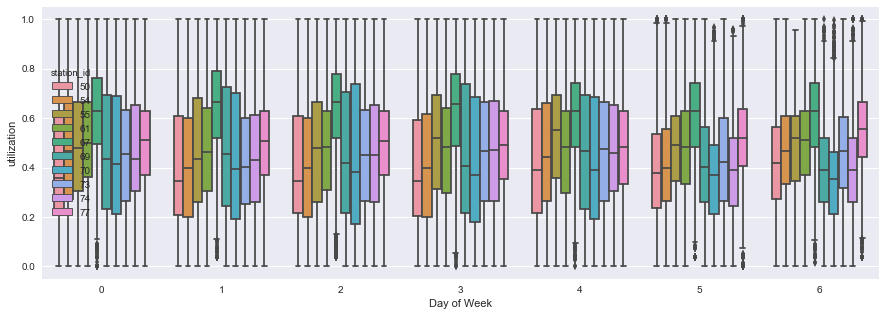

In [76]:
plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=temp.index.dayofweek, y="utilization", hue="station_id", data=temp)

ax.set(xlabel='Day of Week')
# plt.legend()
plt.show()



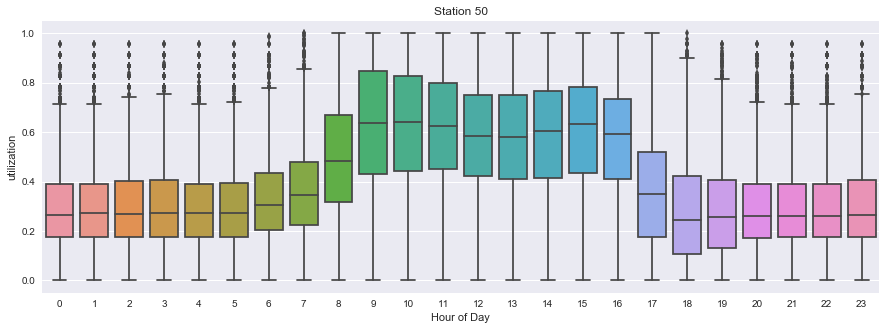

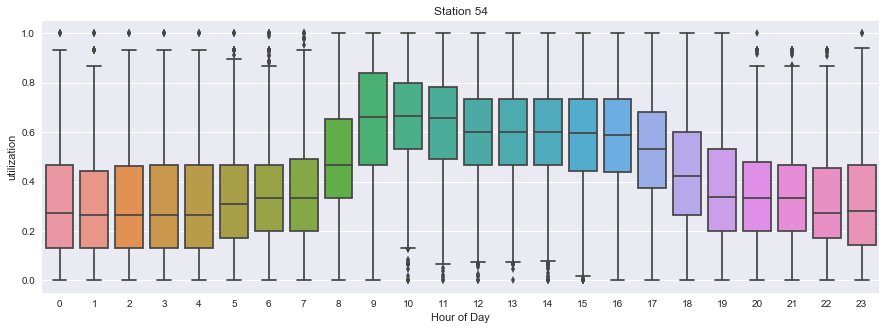

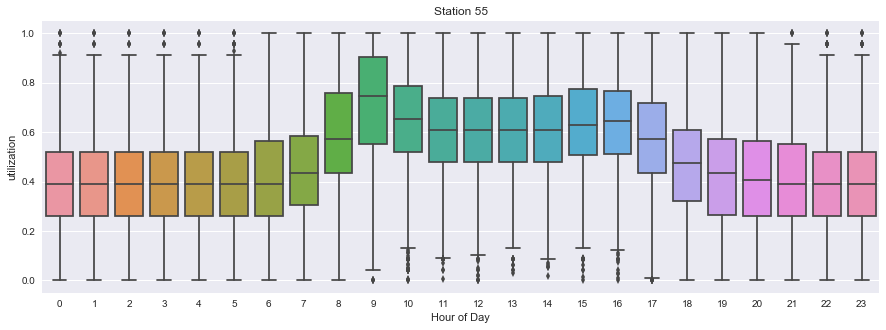

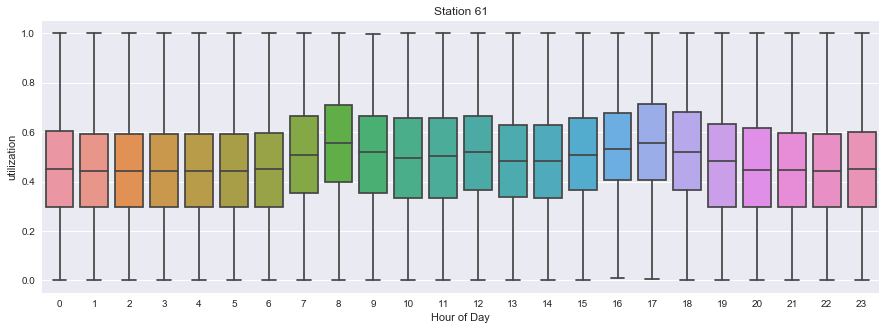

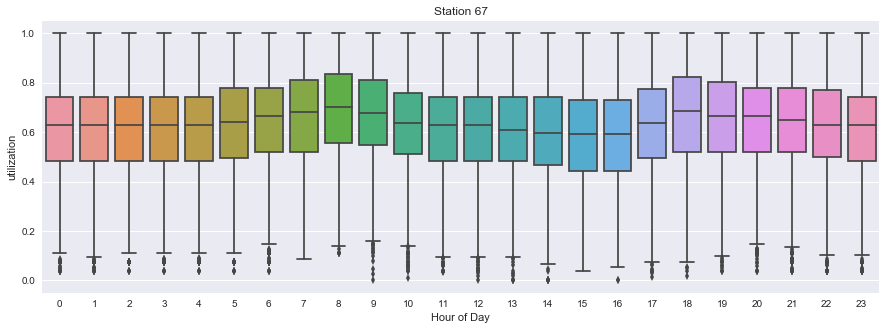

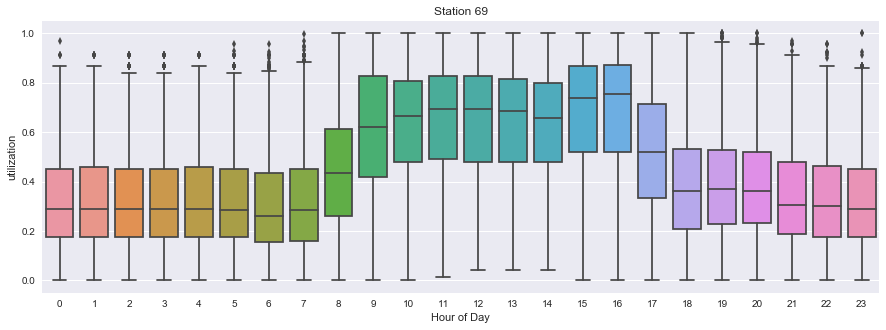

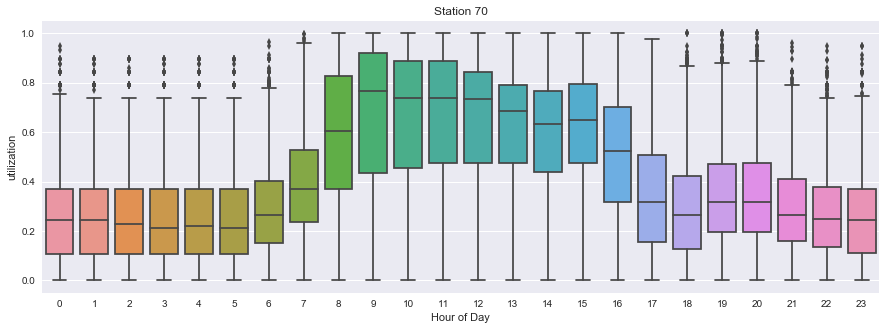

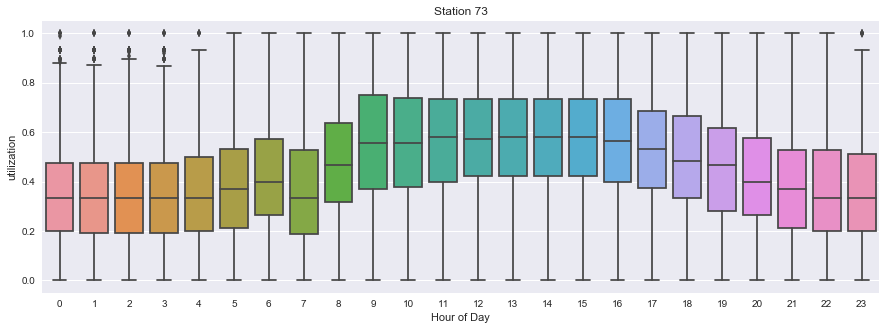

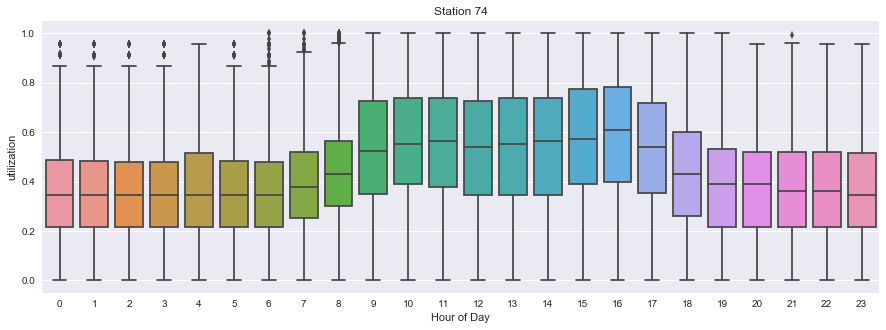

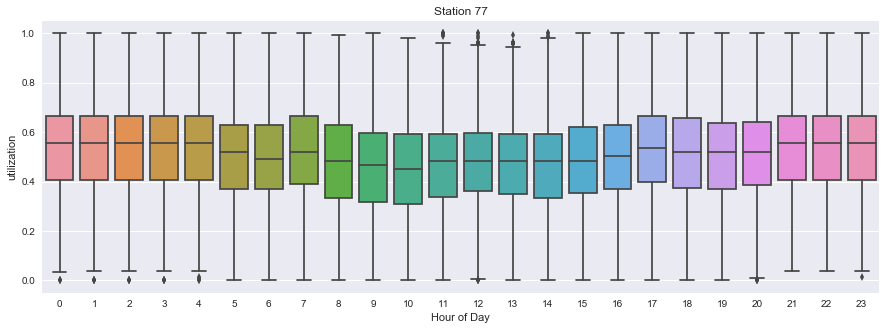

In [77]:
for i in top_am_commute_start_terms:
    temp = status_data[status_data.station_id == i]

    plt.subplots(figsize=(15,5))
    ax = sns.boxplot(x=temp.index.hour, y="utilization", data=temp)
    ax.set(xlabel='Hour of Day')
    ax.set(title='Station %s' % i)
    # plt.legend()
    plt.show()




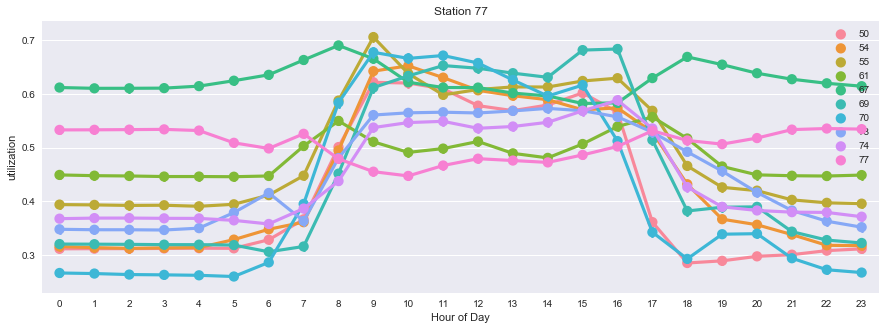

In [78]:

top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]
plt.subplots(figsize=(15,5))
ax = sns.pointplot(x=temp.index.hour, y="utilization", hue='station_id', data=temp)
ax.set(xlabel='Hour of Day')
ax.set(title='Station %s' % i)
plt.legend()
plt.show()

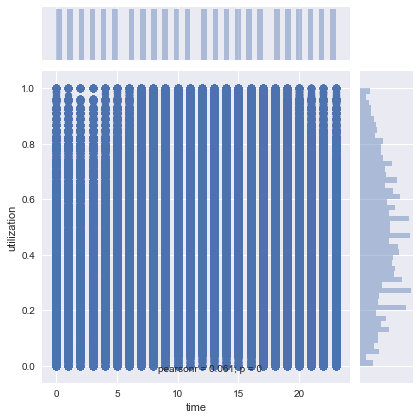

In [79]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]

sns.jointplot(x=temp.index.hour, y="utilization", data=temp)

In [ ]:

top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]
temp = status_data[status_data.station_id.isin(top_am_commute_start_terms)]
plt.subplots(figsize=(15,5))
ax = sns.jointplot(x=temp.index.hour, y="utilization", data=temp, kind='reg')
ax.set(xlabel='Hour of Day')
ax.set(title='Station %s' % i)
plt.legend()
plt.show()

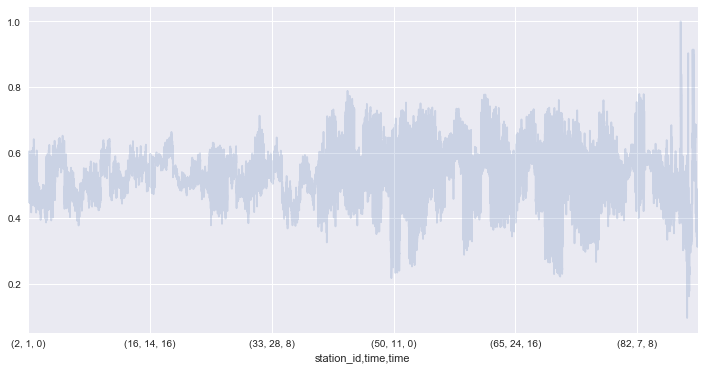

In [81]:
status_data.groupby(['station_id', status_data.index.day, status_data.index.hour])['utilization'].mean().plot(figsize=(12,6), alpha=0.2)
plt.show()

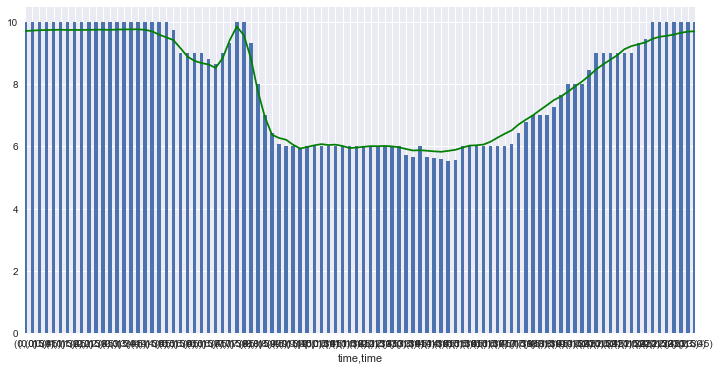

In [82]:
test = status_data[status_data.station_id == 73]
ax = test.groupby([test.index.hour, test.index.minute])['bikes_available'].median().plot(kind='bar', figsize=(12,6))
test.groupby([test.index.hour, test.index.minute])['bikes_available'].mean().plot(kind='line', color='g', ax=ax)
# test.groupby([test.index.hour, test.index.minute])['dock_count'].max().plot(kind='line', color='r', ax=ax)
plt.show()

In [83]:
top_am_commute_start_terms = [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]

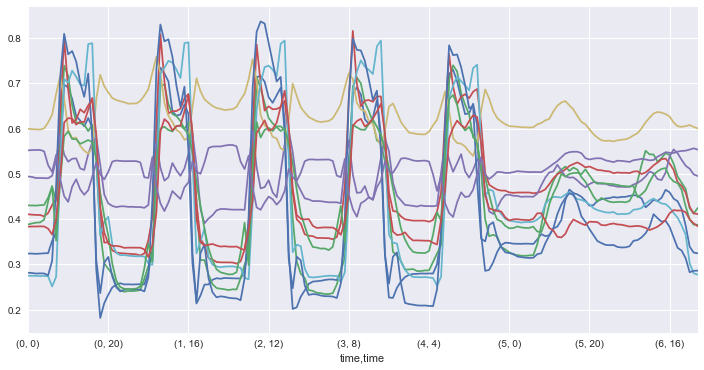

In [84]:
counter = 0

for station in [50, 54, 55, 61, 67, 69, 70, 73, 74, 77]:
    test = status_data[status_data.station_id == station]
    
    if counter == 0:
#         ax = test.groupby([test.index.dayofweek, test.index.hour, test.index.minute])['utilization'].mean().plot(kind='line', figsize=(12,6))
        ax = test.groupby([test.index.dayofweek, test.index.hour])['utilization'].mean().plot(kind='line', figsize=(12,6))
        counter += 1
    else:
#         test.groupby([test.index.dayofweek, test.index.hour, test.index.minute])['utilization'].mean().plot(kind='line', ax=ax)
        test.groupby([test.index.dayofweek, test.index.hour])['utilization'].mean().plot(kind='line', ax=ax)

plt.show()